In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [111]:
#optional to allow for complete inspection of items
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
#Original data set without address and lat and long
ahp = pd.read_csv('Ames_HousePrice.csv')

In [3]:
ahp.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


# Cleaning LotFrontage

I calculated the median length for each lot (separately for each Lot Config) where Lot Frontage was not null by dividing lot area by Lot frontage. 

Length * Width (i.e.Lot Frontage)=Lot Area.


I then imputed Lot Frontage for those where it was null by Dividing Lot Area by the median lot length for the matching Lot Config.

In [ ]:
ahp.loc[((ahp['LotConfig']=='Inside')&(ahp['LotArea'].isna()==False)&(ahp['LotFrontage'].isna()==False))]

In [5]:
ahp['LotConfig'].unique()

array(['Corner', 'Inside', 'FR2', 'CulDSac', 'FR3'], dtype=object)

In [20]:
sum(ahp['LotFrontage'].isna())

462

<AxesSubplot:>

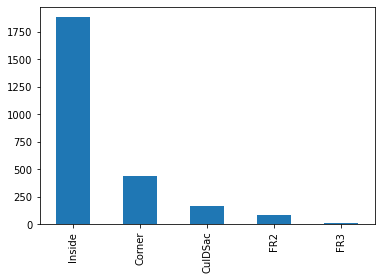

In [139]:
ahp['LotConfig'].value_counts().plot(kind='bar')

In [123]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Inside')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean:  137.57221997359383
Median:  128.7741935483871
Standard Deviation:  63.263512314169006


In [212]:
ahp[(ahp['LotConfig']=='Inside') & (ahp['LotFrontage'].isna())]

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,perc_1stflr,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,house_footprint,price_sfgr,price_sf,Bsmt_Y,house_ga_footprint,OutdoorSpace,AgeSold,RoomSize,QualXSF,CondXSF
13,14,535105100,1394,159000,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD,Normal,1.000000,0.0,0.0,609.0,0.0,0.0,0.146737,114.060258,57.030129,1,0.200842,76,46,464.666667,8364,6970
18,19,534152050,1610,205000,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2001,Gable,CompShg,Plywood,Plywood,BrkFace,28.0,TA,TA,PConc,TA,TA,Mn,ALQ,1200.0,Unf,0.0,410.0,1610.0,GasA,Gd,Y,SBrkr,1610,0,0,1.0,0.0,2,0,3,1,Gd,6,Typ,2,TA,Attchd,1977.0,RFn,2.0,480.0,TA,TA,Y,168,68,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,1.000000,0.0,1200.0,0.0,0.0,0.0,0.151844,127.329193,63.664596,1,0.197114,236,9,536.666667,9660,11270
27,28,533221090,1573,177500,160,FV,NaN,2117,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,216.0,Gd,TA,PConc,Gd,TA,No,GLQ,378.0,Unf,0.0,378.0,756.0,GasA,Ex,Y,SBrkr,769,804,0,0.0,0.0,2,1,3,1,Gd,5,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0.488875,378.0,0.0,0.0,0.0,0.0,0.363250,112.841704,76.212967,1,0.571091,32,10,524.333333,9438,7865
38,39,527327050,2030,195000,60,RL,NaN,12046,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,BrkFace,298.0,TA,TA,CBlock,TA,TA,No,LwQ,156.0,Unf,0.0,692.0,848.0,GasA,TA,Y,SBrkr,1118,912,0,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1976.0,Fin,2.0,551.0,TA,TA,Y,0,224,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,0.550739,0.0,0.0,0.0,0.0,156.0,0.092811,96.059113,67.755386,1,0.138552,224,31,507.500000,12180,12180
43,44,532376250,925,133500,20,RL,NaN,8638,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,6,1963,1963,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,181.0,Unf,0.0,744.0,925.0,GasA,Gd,Y,SBrkr,925,0,0,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1990.0,Unf,2.0,484.0,TA,TA,Y,203,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,1.000000,0.0,181.0,0.0,0.0,0.0,0.107085,144.324324,72.162162,1,0.163116,277,43,462.500000,4625,5550
59,60,533135020,1755,235000,60,RL,NaN,11949,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,8,1991,2008,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,Gd,PConc,Gd,TA,No,GLQ,601.0,ALQ,216.0,158.0,975.0,GasA,Ex,Y,SBrkr,975,780,0,0.0,1.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1991.0,Unf,2.0,524.0,TA,TA,Y,502,60,0,0,0,0,NaN,GdPrv,NaN,0,7,2009,WD,Normal,0.555556,601.0,216.0,0.0,0.0,0.0,0.081597,133.903134,86.080586,1,0.125450,562,1,585.000000,12285,14040
62,63,533213010,1726,222000,120,FV,NaN,3830,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,6,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,280.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1726.0,1726.0,GasA,Ex,Y,S

In [214]:
ahp.loc[ahp['LotConfig']=='Inside','LotFrontage'].fillna(ahp['LotArea']/128,inplace=True)

In [140]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 121-124 for corner
print('Mean Corner: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median Corner: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation Corner: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='Corner')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean Corner:  124.2385928880386
Median Corner:  121.68031674208146
Standard Deviation Corner:  26.92939927628017


In [215]:
ahp.loc[ahp['LotConfig']=='Corner','LotFrontage'].fillna(ahp['LotArea']/121,inplace=True)

In [201]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean CulDSac: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median CulDSac: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation CulDSac: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='CulDSac')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean CulDSac:  272.4834982635029
Median CulDSac:  247.26190476190476
Standard Deviation CulDSac:  177.93762237026547


In [216]:
ahp.loc[ahp['LotConfig']=='CulDSac','LotFrontage'].fillna(ahp['LotArea']/247,inplace=True)

In [202]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean FR2: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median FR2: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation FR2: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR2')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean FR2:  165.48439689350496
Median FR2:  141.43287037037038
Standard Deviation FR2:  75.66351898940025


In [217]:
ahp.loc[ahp['LotConfig']=='FR2','LotFrontage'].fillna(ahp['LotArea']/141,inplace=True)

In [203]:
#was initially looking at imputing lotfrontage : Lot area/LotFrontage = 128-137
print('Mean FR3: ',np.mean(np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))
print('Median FR3: ',np.median(np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

print('Standard Deviation FR3: ',np.std(np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&(~ahp['LotFrontage'].isna()))]\
         ['LotArea'])/np.array(ahp.loc[((ahp['LotConfig']=='FR3')&(~ahp['LotArea'].isna())&\
                                      (~ahp['LotFrontage'].isna()))]['LotFrontage'])))

Mean FR3:  119.76491007437089
Median FR3:  122.82857142857142
Standard Deviation FR3:  28.002270156258174


In [218]:
ahp.loc[ahp['LotConfig']=='FR3','LotFrontage'].fillna(ahp['LotArea']/123,inplace=True)

In [142]:
ahp.isna().sum()

Unnamed: 0               0
PID                      0
GrLivArea                0
SalePrice                0
MSSubClass               0
MSZoning                 0
LotFrontage            462
LotArea                  0
Street                   0
Alley                 2412
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType              14
MasVnrArea              14
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                69
BsmtCond                69
BsmtExposure            71
BsmtFinType1            69
B

# New Features

In [105]:
#price per square foot ground level and above living area
ahp['price_sfgr']=ahp['SalePrice']/ahp['GrLivArea']

In [108]:
#price per square foot including basement
ahp['price_sf']=ahp['SalePrice']/(ahp['GrLivArea']+ahp['TotalBsmtSF'])

In [40]:
#percent 1st floor
ahp['perc_1stflr']=ahp['1stFlrSF']/ahp['GrLivArea']

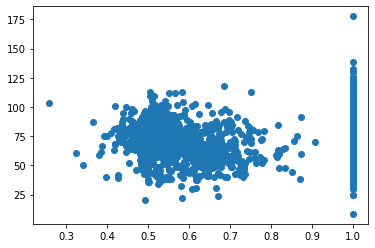

In [109]:
plt.scatter(ahp['perc_1stflr'],ahp['price_sf'])

In [90]:
#percent of lot occupied by house
ahp['house_footprint']=ahp['1stFlrSF']/ahp['LotArea']

In [ ]:
#fill in null values in GarageArea
ahp['GarageArea'].fillna(0,inplace=True)

In [116]:
#percent of lot occupied by house and garage
ahp['house_ga_footprint']=(ahp['GarageArea']+ahp['1stFlrSF'])/ahp['LotArea']

/Users/jamesreno/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='house_ga_footprint', ylabel='SalePrice'>

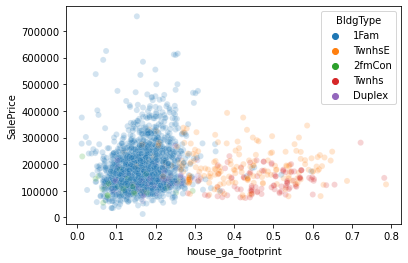

In [117]:
#plt.scatter(ahp['house_footprint'],ahp['SalePrice'],c=ahp['BldgType'])
sns.scatterplot(ahp['house_ga_footprint'],ahp['SalePrice'],hue=ahp['BldgType'],alpha=0.2)

In [152]:
#Approximate room size, Quality * SF, Cond*SF
ahp['RoomSize']=ahp['GrLivArea']/ahp['BedroomAbvGr']
ahp['QualXSF']=ahp['GrLivArea']*ahp['OverallQual']
ahp['CondXSF']=ahp['GrLivArea']*ahp['OverallCond']

<AxesSubplot:ylabel='SalePrice'>

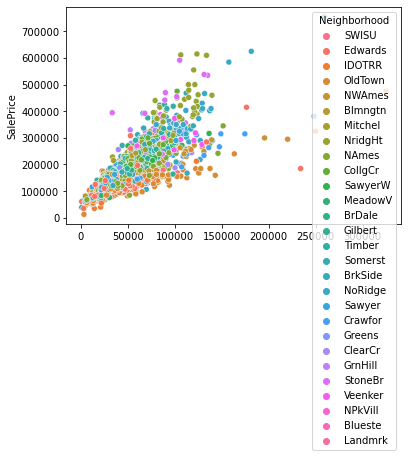

In [165]:
#examining condition*quality*sf
sns.scatterplot(x=(ahp['CondXSF']*ahp['OverallQual']),y=ahp['SalePrice'],hue=ahp['Neighborhood'])

<AxesSubplot:xlabel='QualXSF', ylabel='SalePrice'>

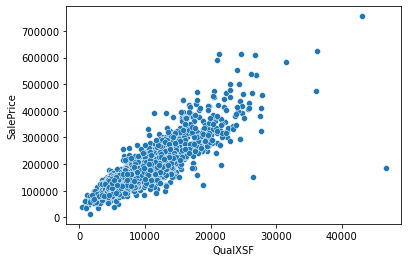

In [156]:
#prettiest of all the correlations
sns.scatterplot(x=ahp['QualXSF'],y=ahp['SalePrice'])

<AxesSubplot:xlabel='RoomSize', ylabel='SalePrice'>

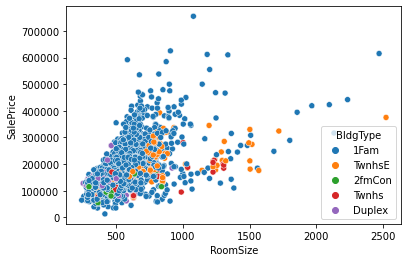

In [158]:
sns.scatterplot(x=ahp['RoomSize'],y=ahp['SalePrice'],hue=ahp['BldgType'])

In [ ]:
#No cases where BsmtFinType1 and Type2 are both the same except when UNF
#checking before creating SF for each basement fin type
ahp.loc[ahp['BsmtFinType2']==ahp['BsmtFinType1']][['BsmtFinType2','BsmtFinType1']]

In [79]:
#all NAs for BSMTFinType1 have 0 total sf of basement - so filling in 0 for na
ahp[ahp['BsmtFinType1'].isna()==False][['BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtGLQSF','BsmtUnfSF','TotalBsmtSF']]

,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtGLQSF,BsmtUnfSF,TotalBsmtSF
0,Rec,Unf,238.0,0.0,0.0,618.0,856.0
1,GLQ,ALQ,552.0,393.0,552.0,104.0,1049.0
2,ALQ,Unf,737.0,0.0,0.0,100.0,837.0
3,Unf,Unf,0.0,0.0,0.0,405.0,405.0
4,GLQ,Unf,643.0,0.0,643.0,167.0,810.0
6,Unf,Unf,0.0,0.0,0.0,936.0,936.0
7,Unf,Unf,0.0,0.0,0.0,1146.0,1146.0
8,ALQ,Unf,647.0,0.0,0.0,217.0,864.0
9,GLQ,Unf,467.0,0.0,467.0,80.0,547.0
10,GLQ,Unf,24.0,0.0,24.0,1318.0,1342.0


In [ ]:
#filling in BsmtFinSF NAs
ahp['BsmtFinSF1'].fillna(0,inplace=True)
ahp['BsmtFinSF2'].fillna(0,inplace=True)

In [78]:
# total sf of each type of basement condition
ahp['BsmtGLQSF']=np.where(ahp['BsmtFinType1']=='GLQ',ahp['BsmtFinSF1'],0)
ahp['BsmtGLQSF']=np.where(ahp['BsmtFinType2']=='GLQ',ahp['BsmtFinSF2'],ahp['BsmtGLQSF'])

In [81]:
ahp['BsmtALQSF']=np.where(ahp['BsmtFinType1']=='ALQ',ahp['BsmtFinSF1'],0)
ahp['BsmtALQSF']=np.where(ahp['BsmtFinType2']=='ALQ',ahp['BsmtFinSF2'],ahp['BsmtALQSF'])
ahp['BsmtBLQSF']=np.where(ahp['BsmtFinType1']=='BLQ',ahp['BsmtFinSF1'],0)
ahp['BsmtBLQSF']=np.where(ahp['BsmtFinType2']=='BLQ',ahp['BsmtFinSF2'],ahp['BsmtBLQSF'])
ahp['BsmtRecSF']=np.where(ahp['BsmtFinType1']=='Rec',ahp['BsmtFinSF1'],0)
ahp['BsmtRecSF']=np.where(ahp['BsmtFinType2']=='Rec',ahp['BsmtFinSF2'],ahp['BsmtRecSF'])
ahp['BsmtLwQSF']=np.where(ahp['BsmtFinType1']=='LwQ',ahp['BsmtFinSF1'],0)
ahp['BsmtLwQSF']=np.where(ahp['BsmtFinType2']=='LwQ',ahp['BsmtFinSF2'],ahp['BsmtLwQSF'])

In [85]:
#examining new features and original variables used to derive them
ahp.loc[(ahp['BsmtGLQSF']+ahp['BsmtALQSF']+ahp['BsmtBLQSF']+ahp['BsmtRecSF']+ahp['BsmtLwQSF']+ahp['BsmtUnfSF'])\
        !=ahp['TotalBsmtSF']][['BsmtGLQSF','BsmtALQSF','BsmtBLQSF','BsmtRecSF','BsmtLwQSF','BsmtUnfSF',\
                               'TotalBsmtSF','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,BsmtUnfSF,TotalBsmtSF,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
912,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0
1349,0.0,0.0,119.0,0.0,0.0,261.0,923.0,BLQ,543.0,BLQ,119.0
1805,632.0,0.0,0.0,0.0,0.0,423.0,1061.0,GLQ,632.0,Unf,6.0
2434,1124.0,0.0,0.0,0.0,0.0,1603.0,3206.0,GLQ,1124.0,NaN,479.0


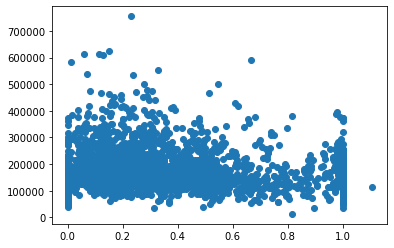

In [96]:
#not the prettiest correlation of %unfinished basement/grlivarea
plt.scatter(((ahp['BsmtUnfSF']/ahp['GrLivArea'])),ahp['SalePrice'])
#*(ahp['TotalBsmtSF']/ahp['GrLivArea'])

In [120]:
ahp.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,perc_1stflr,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,house_footprint,price_sfgr,price_sf,Bsmt_Y,house_ga_footprint,OutdoorSpace,AgeSold
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1.000000,0.0,0.0,0.0,238.0,0.0,0.108492,147.196262,73.598131,1,0.159062,0,60
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1.000000,552.0,393.0,0.0,0.0,0.0,0.247698,132.983794,66.491897,1,0.310508,105,25
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1.000000,0.0,737.0,0.0,0.0,0.0,0.165182,124.775225,67.954298,1,0.200825,282,0
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,0.690087,0.0,0.0,0.0,0.0,0.0,0.088019,109.720885,78.947368,1,0.122514,168,6
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,0.486486,643.0,0.0,0.0,0.0,0.0,0.096429,136.336336,91.717172,1,0.159286,45,8


In [113]:
#has basement yes=1 - will use for interaction term later to see if it impacts model
ahp['Bsmt_Y']=np.where(ahp['TotalBsmtSF']>0,1,0)

In [ ]:
#add outdoor space and house age, dummify variables, deal with NAs, split test train, 
#run penalized regression to identify best combo, standardize, run model with and without interactions
#


In [118]:
#outdoor space sf total
ahp['OutdoorSpace']=ahp['WoodDeckSF']+ahp['OpenPorchSF']+ahp['EnclosedPorch']+ahp['3SsnPorch']

In [119]:
#age sold only years going to use month as separate predictor
ahp['AgeSold']=ahp['YrSold']-ahp['YearRemodAdd']

# Clean data set

In [175]:
#new copy of the data set before dropping columns
ahp_cleaned=ahp.copy()

In [176]:
#Left PID so we can drop the house identified by chad before proceeding
ahp_cleaned.drop(columns=['Unnamed: 0','PoolArea','PoolQC','MiscFeature','MiscVal','EnclosedPorch','3SsnPorch',\
                         'ScreenPorch','WoodDeckSF','OpenPorchSF','Electrical','YearBuilt','YearRemodAdd',\
                          'GarageYrBlt','Fence','BsmtFinType1',\
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2','Alley','Utilities'],inplace=True)

In [177]:
ahp_cleaned.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'perc_1stflr', 'BsmtGLQSF', 'BsmtALQSF',
       'BsmtBLQSF', 'BsmtRecSF', 'BsmtLw

## Fixing remaining NAs

Note Lot Frontage dealt with above

In [200]:
#Looking at all columns with NAs
ahp_cleaned.isna().sum()

PID                     0
GrLivArea               0
SalePrice               0
MSSubClass              0
MSZoning                0
LotFrontage           462
LotArea                 0
Street                  0
LotShape                0
LandContour             0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual                0
BsmtCond                0
BsmtExposure            0
BsmtUnfSF               0
TotalBsmtSF             0
Heating                 0
HeatingQC               0
CentralAir              0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF

In [196]:
#space to examine each variable before cleaning their NAs
ahp_cleaned[ahp_cleaned['price_sf'].isna()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,perc_1stflr,BsmtGLQSF,BsmtALQSF,BsmtBLQSF,BsmtRecSF,BsmtLwQSF,house_footprint,price_sfgr,price_sf,Bsmt_Y,house_ga_footprint,OutdoorSpace,AgeSold,RoomSize,QualXSF,CondXSF
912,903230120,896,79000,20,RM,99.0,5940,Pave,IR1,Lvl,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,0.0,0.0,GasA,TA,Y,896,0,0,0.0,0.0,1,0,2,1,TA,4,Typ,0,NA,Detchd,Unf,1.0,280.0,TA,TA,Y,4,2008,ConLD,Abnorml,1.0,0.0,0.0,0.0,0.0,0.0,0.150842,88.169643,NaN,0,0.19798,0,58,448.0,3584,6272


In [179]:
ahp_cleaned['MasVnrType']=np.where(ahp_cleaned['MasVnrType'].isna(),'None',ahp_cleaned['MasVnrType'])
ahp_cleaned['MasVnrArea']=np.where(ahp_cleaned['MasVnrArea'].isna(),0,ahp_cleaned['MasVnrArea'])

In [180]:
ahp_cleaned['BsmtQual']=np.where(ahp_cleaned['BsmtQual'].isna(),'NA',ahp_cleaned['BsmtQual'])
ahp_cleaned['BsmtCond']=np.where(ahp_cleaned['BsmtCond'].isna(),'NA',ahp_cleaned['BsmtCond'])
ahp_cleaned['BsmtExposure']=np.where(ahp_cleaned['BsmtExposure'].isna(),'NA',ahp_cleaned['BsmtExposure'])

In [188]:
ahp_cleaned['BsmtUnfSF'].fillna(0,inplace=True)
ahp_cleaned['TotalBsmtSF'].fillna(0,inplace=True)
ahp_cleaned['BsmtFullBath'].fillna(0,inplace=True)
ahp_cleaned['BsmtHalfBath'].fillna(0,inplace=True)

In [195]:
ahp_cleaned['FireplaceQu'].fillna('NA',inplace=True)
ahp_cleaned['GarageType'].fillna('NA',inplace=True)
ahp_cleaned['GarageFinish'].fillna('NA',inplace=True)
ahp_cleaned['GarageQual'].fillna('NA',inplace=True)
ahp_cleaned['GarageCond'].fillna('NA',inplace=True)
ahp_cleaned['GarageCars'].fillna(0,inplace=True)

In [199]:
ahp_cleaned['price_sf'].fillna((ahp_cleaned['SalePrice']/(ahp_cleaned['GrLivArea']+ahp_cleaned['TotalBsmtSF'])),inplace=True)
ahp['price_sf'].fillna((ahp['SalePrice']/(ahp['GrLivArea']+ahp['TotalBsmtSF'])),inplace=True)

In [184]:
ahp_cleaned['BsmtExposure'].unique()

array(['No', 'Mn', 'NA', 'Gd', 'Av'], dtype=object)